## Import Libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Our Goal: to predict the price given a set of attributes.

## Load the Data

In [2]:
from sklearn import datasets
boston = datasets.load_boston()


In [3]:
X_boston,y_boston = boston.data, boston.target
print('Shape of data:', X_boston.shape, y_boston.shape)

Shape of data: (506, 13) (506,)


In [4]:
print('Keys:', boston.keys())
print('Feature names:',boston.feature_names)

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## EDA (Exploratory Data Analysis)

## Q1: Create a dataframe and Save that dataset inside it.

In [7]:
data = pd.DataFrame(X_boston, columns=boston.feature_names)
data['Price'] = y_boston  

## Q2: Print the head rows of the dataframe.

In [9]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Q3: Use histogram to show the distribution of House Prices.

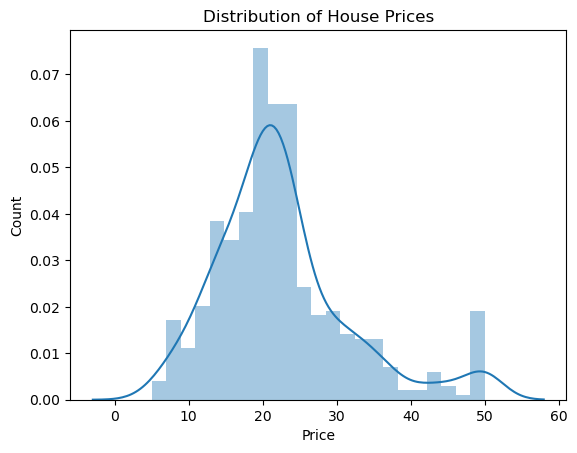

In [18]:
sns.distplot(data['Price'])
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count');

## Q4: Use a heatmap to show the correlation between features and the target labels.

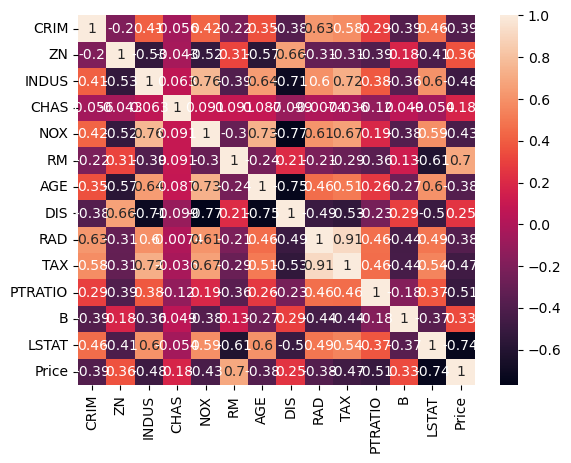

In [19]:
sns.heatmap(data.corr(), annot=True);

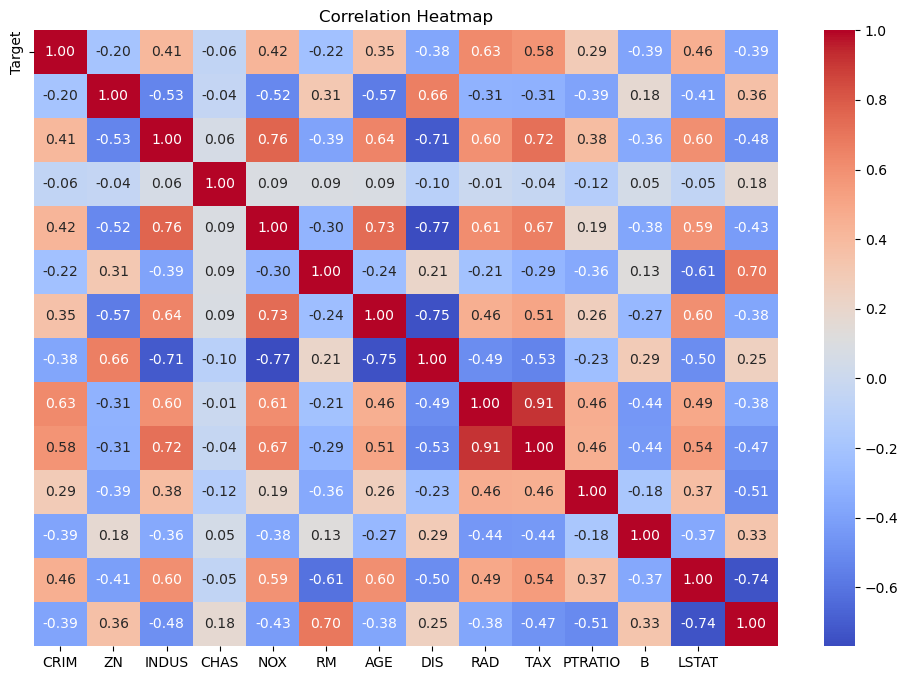

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=boston.feature_names, yticklabels=['Target'])
plt.title('Correlation Heatmap')
plt.show()

## Q5: Use a lmplot to draw the relations between price and LSTAT.

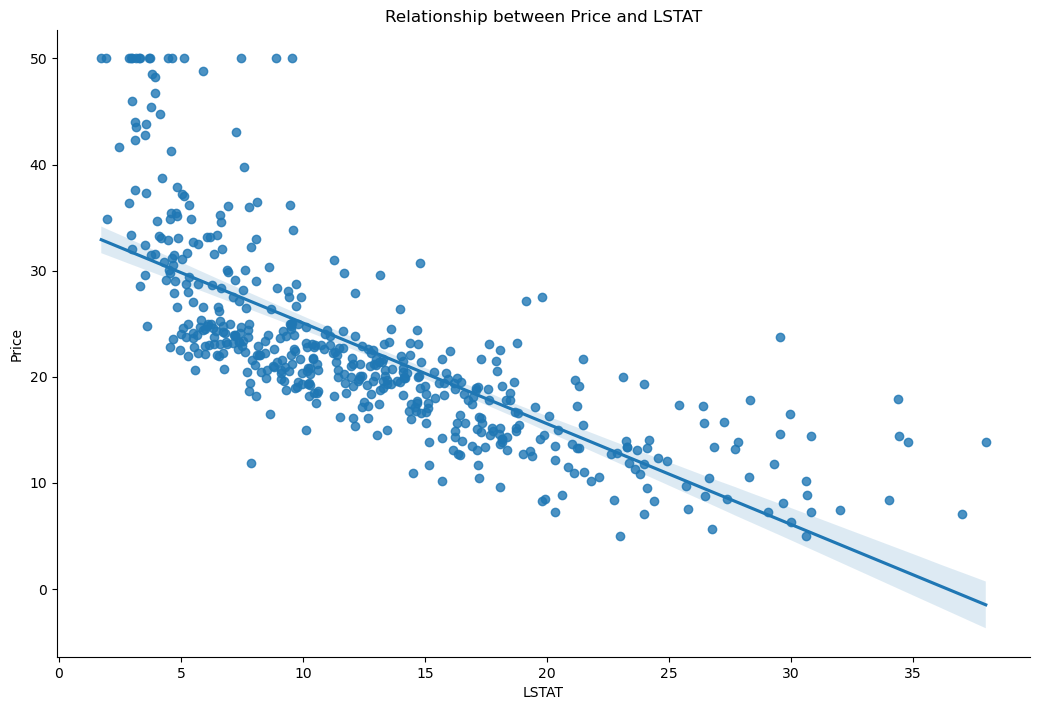

In [26]:
sns.lmplot(x='LSTAT', y='Price', data=data,height=7, aspect=1.5)
plt.xlabel('LSTAT')
plt.ylabel('Price')
plt.title('Relationship between Price and LSTAT')
plt.show()


## Q6: Use a lmplot to draw the relations between price and RM.

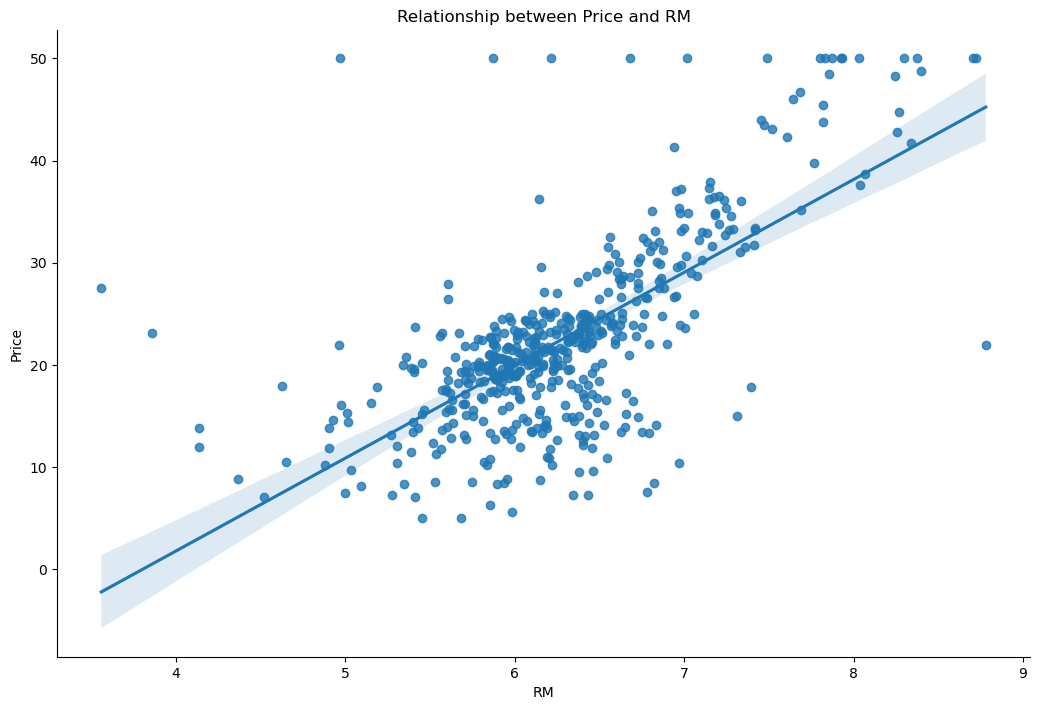

In [27]:
sns.lmplot(x='RM', y='Price', data=data, height=7, aspect=1.5)
plt.xlabel('RM')
plt.ylabel('Price')
plt.title('Relationship between Price and RM')
plt.show()

In [29]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

## Q7: Split the dataset into Train and Test sets with test_size=30% and random_state=23.

In [34]:
X = data.drop('Price', axis=1)
y = data['Price']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

print("Shape of X_train:", X_train.shape)

Shape of X_train: (354, 13)


In [36]:
print("Shape of X_test:", X_test.shape)


Shape of X_test: (152, 13)


In [37]:
print("Shape of y_train:", y_train.shape)


Shape of y_train: (354,)


In [38]:
print("Shape of y_test:", y_test.shape)

Shape of y_test: (152,)


## Q8: Build a Linear Regression Model.

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
model = LinearRegression()

## Q9: Train the Model.

In [54]:
model.fit(X_train, y_train)

LinearRegression()

## Q10: Evaluate the model. 
- print intercept and coefficients.
- compare between predictions and real values, then visualize them.
- Draw Residual Histogram.

In [75]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 27.78960670325093
Coefficients: [-9.34184911e-02  4.33034125e-02 -2.25219455e-02  3.34204681e+00
 -1.63301964e+01  4.27193035e+00  7.20755545e-04 -1.40323066e+00
  2.55428997e-01 -7.48230095e-03 -8.50445960e-01  1.46848799e-02
 -5.29853457e-01]


In [76]:
y_pred = model.predict(X_test)

comparison = pd.DataFrame({'Real Values': y_test, 'Predictions': y_pred})
print(comparison.head(10))

     Real Values  Predictions
176         23.2    25.488826
311         22.1    26.853833
94          20.6    26.501137
139         17.8    16.831155
232         41.7    38.905482
411         17.2    15.926408
122         20.5    19.231522
344         31.2    29.288066
275         32.0    33.794289
226         37.6    38.258943


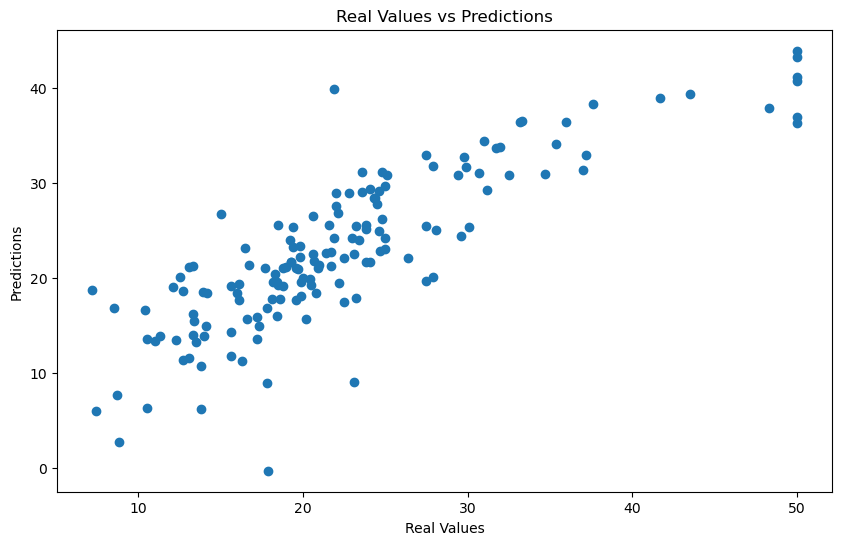

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.title("Real Values vs Predictions")
plt.show()

## Residual Histogram

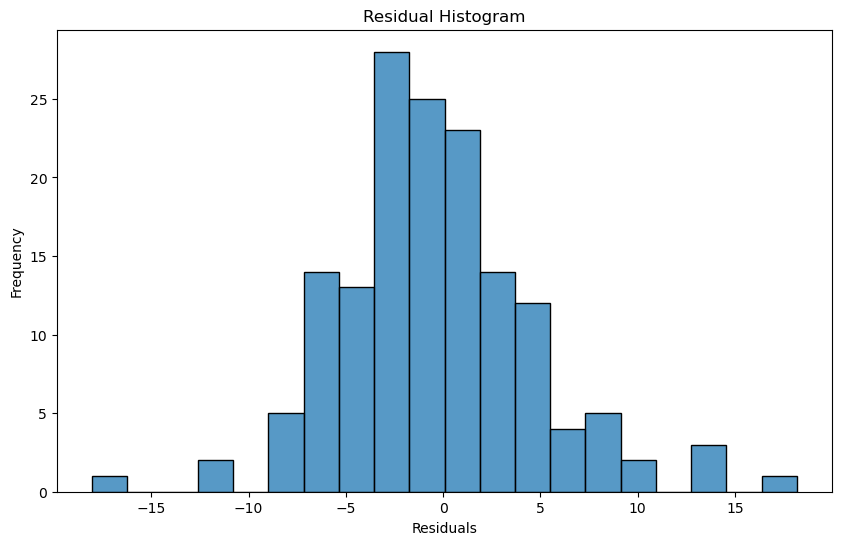

In [72]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Histogram")
plt.show()

## Q11: Use evaluation metrics MAE, MSE, RMSE and R^2.

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

MAE: 3.7824295112050246
MSE: 25.358577194006976
RMSE: 5.035730055712575
R^2: 0.6947991644651349
